In [1]:
import os
import glob
import pickle

import numpy as np
import pandas as pd

from pprint import pprint

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(17)

Dataset [CICIDS 2017](https://www.kaggle.com/datasets/cicdataset/cicids2017) 

In [3]:
DATA_PATH = '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE'

In [4]:
all_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))
all_files

['/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/Machi

In [5]:
df_from_each_file = (pd.read_csv(f) for f in all_files[:1])
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [8]:
type(df) is pd.DataFrame

True

In [6]:
anomaly_cols = ['DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

anomaly_cols_map = {col:1 for col in anomaly_cols}
anomaly_cols_map['BENIGN'] = 0

df['Label_bin'] = df[' Label'].map(anomaly_cols_map)

In [7]:
encoder = LabelEncoder()
df['Label_encoded'] = encoder.fit_transform(df[' Label'])

Label_str = df[' Label']
df.drop([' Label'], axis=1, inplace=True)

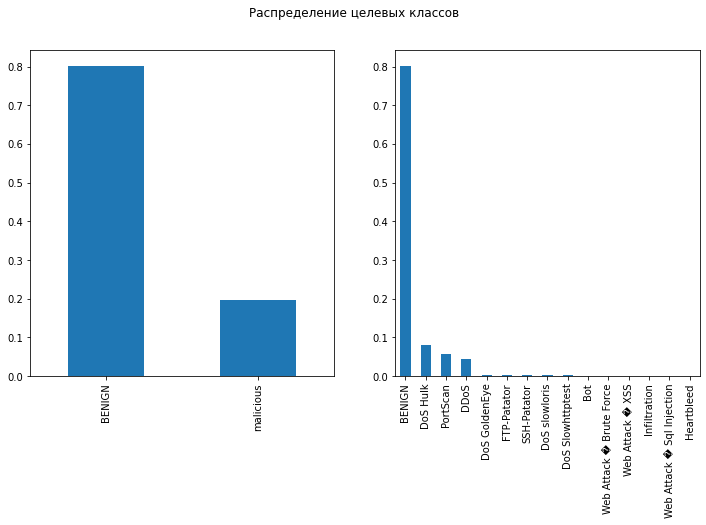

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Распределение целевых классов')

df['Label_bin'].map({1:'malicious', 0:'BENIGN'}).value_counts(normalize=True).plot(kind='bar', ax=ax1)

Label_str.value_counts(normalize=True).plot(kind='bar',  ax=ax2)
plt.xticks(rotation=90)
plt.show();

In [9]:
# # распределение значений целевой переменной

# df['Label_bin'].value_counts(normalize=True).plot(kind='bar', ax=ax1)
# # plt.title('Распределение целевых классов')

# # распределение значений целевой переменной

# Label_str.value_counts(normalize=True).plot(kind='bar')
# plt.xticks(rotation=90)
# plt.title('Распределение целевых классов')

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [30]:
X, y = df.drop(['Label_bin', 'Label_encoded'], axis=1), df['Label_encoded']

In [31]:
scaler = StandardScaler()
train_X = scaler.fit_transform(X.select_dtypes(include=['float64', 'float32','float16','int32','int16','int8']))

In [32]:
X_train,X_test,y_train,y_test = train_test_split(train_X, y, test_size=0.2, random_state=42, stratify=y)

Классические алгоритмы

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

In [15]:
clf_names = [
    "LogisticRegression",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM"
]

clfs = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(4),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
]

In [16]:
f1_scorer = make_scorer(f1_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

scorers = {
    'accuracy_score': accuracy_scorer,
    'precision_score': precision_scorer,
    'recall_score': recall_scorer,
    'f1_score': f1_scorer,
}

In [33]:


# print('Running '+clf_name)
# kf = StratifiedKFold(n_splits=3, shuffle=True)

# scores = cross_validate(clf, X_test, y_test, cv=kf, scoring=scorers, verbose=1, n_jobs=-1)
# scores

In [17]:
%%time

algo_scores = {clf_name: {} for clf_name in clf_names}

for clf_name, clf in zip(clf_names, clfs):
    
    print('Running '+clf_name)
    kf = StratifiedKFold(n_splits=3, shuffle=True)
    scores = cross_validate(clf, X_test, y_test, cv=kf, scoring=scorers, verbose=1, n_jobs=-1)
    print(scores)
    for score_name, score in scores.items():
        if 'test' in score_name:
            algo_scores[clf_name][score_name] = round(score.mean(), 4)

Running LogisticRegression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'fit_time': array([7.21687484, 6.82156825, 7.43550086]), 'score_time': array([0.27203012, 0.28574634, 0.27163386]), 'test_accuracy_score': array([0.93917019, 0.93793396, 0.9350431 ]), 'test_precision_score': array([0.93869737, 0.93745699, 0.93680787]), 'test_recall_score': array([0.93917019, 0.93793396, 0.9350431 ]), 'test_f1_score': array([0.9389061 , 0.93766873, 0.93574486])}
Running Decision Tree


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'fit_time': array([5.81058359, 5.68571734, 5.7719295 ]), 'score_time': array([0.30346584, 0.3065896 , 0.29818845]), 'test_accuracy_score': array([0.98262309, 0.9833656 , 0.98382708]), 'test_precision_score': array([0.9827137 , 0.98349759, 0.98399607]), 'test_recall_score': array([0.98262309, 0.9833656 , 0.98382708]), 'test_f1_score': array([0.98266061, 0.98341613, 0.98388783])}
Running Random Forest


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'fit_time': array([1.66176605, 1.6213336 , 1.66633081]), 'score_time': array([0.41481376, 0.41666269, 0.42535853]), 'test_accuracy_score': array([0.91767714, 0.94076648, 0.9536348 ]), 'test_precision_score': array([0.92502658, 0.94454053, 0.95584837]), 'test_recall_score': array([0.91767714, 0.94076648, 0.9536348 ]), 'test_f1_score': array([0.90888853, 0.93665633, 0.9512762 ])}
Running Neural Net


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'fit_time': array([49.24490738, 41.22136354, 47.91712666]), 'score_time': array([0.44091463, 0.44880605, 0.44461203]), 'test_accuracy_score': array([0.95709345, 0.95922557, 0.95733722]), 'test_precision_score': array([0.95658754, 0.95910591, 0.95692413]), 'test_recall_score': array([0.95709345, 0.95922557, 0.95733722]), 'test_f1_score': array([0.95673461, 0.95916194, 0.95707147])}
Running AdaBoost


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'fit_time': array([77.55672908, 78.78790021, 77.61325955]), 'score_time': array([2.79722095, 2.7423954 , 2.76206565]), 'test_accuracy_score': array([0.99227693, 0.9932741 , 0.99284445]), 'test_precision_score': array([0.99229906, 0.99328427, 0.99285681]), 'test_recall_score': array([0.99227693, 0.9932741 , 0.99284445]), 'test_f1_score': array([0.99228577, 0.99327847, 0.99284971])}
Running Nearest Neighbors


/home/churilov/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/churilov/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

{'fit_time': array([0.21430707, 0.21928358, 0.22375512]), 'score_time': array([1444.1952877 , 1466.22590137, 1458.10190225]), 'test_accuracy_score': array([0.99173058, 0.99126906, 0.99141758]), 'test_precision_score': array([0.99172055, 0.99125767, 0.99140848]), 'test_recall_score': array([0.99173058, 0.99126906, 0.99141758]), 'test_f1_score': array([0.99172472, 0.99126238, 0.99141242])}
CPU times: user 1.04 s, sys: 1.09 s, total: 2.13 s
Wall time: 26min 57s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 24.4min finished


In [34]:
%%time

algo_scores = {clf_name: {} for clf_name in clf_names}

for clf_name, clf in zip(clf_names, clfs):
    
    print('Running '+clf_name)
    kf = StratifiedKFold(n_splits=3, shuffle=True)
    scores = cross_validate(clf, X_test, y_test, cv=kf, scoring=scorers, verbose=1, n_jobs=-1)
    print(scores)
    for score_name, score in scores.items():
        if 'test' in score_name:
            algo_scores[clf_name][score_name] = round(score.mean(), 4)

Running LogisticRegression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'fit_time': array([36.69819021, 35.11732197, 35.91152215]), 'score_time': array([0.27809381, 0.28939724, 0.28066111]), 'test_accuracy_score': array([0.96753233, 0.96710781, 0.96621668]), 'test_precision_score': array([0.96711425, 0.96675178, 0.96597581]), 'test_recall_score': array([0.96753233, 0.96710781, 0.96621668]), 'test_f1_score': array([0.96616348, 0.96578648, 0.96482103])}
Running Decision Tree


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'fit_time': array([5.8000958 , 5.86307526, 6.15885139]), 'score_time': array([0.26078773, 0.27315497, 0.2647047 ]), 'test_accuracy_score': array([0.96482713, 0.96467842, 0.96430712]), 'test_precision_score': array([0.95971125, 0.96639414, 0.96658759]), 'test_recall_score': array([0.96482713, 0.96467842, 0.96430712]), 'test_f1_score': array([0.95992163, 0.96319023, 0.96340358])}
Running Random Forest


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'fit_time': array([1.64544106, 1.83084154, 1.70044756]), 'score_time': array([0.50623322, 0.50548625, 0.49691844]), 'test_accuracy_score': array([0.92315649, 0.94661186, 0.93308049]), 'test_precision_score': array([0.91313631, 0.9378491 , 0.92270224]), 'test_recall_score': array([0.92315649, 0.94661186, 0.93308049]), 'test_f1_score': array([0.9104472 , 0.93669845, 0.92185715])}
Running Neural Net


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'fit_time': array([66.77418375, 68.63183737, 61.12889171]), 'score_time': array([0.47908974, 0.48485327, 0.47473693]), 'test_accuracy_score': array([0.95317887, 0.95469566, 0.95134332]), 'test_precision_score': array([0.94964535, 0.95126782, 0.94781363]), 'test_recall_score': array([0.95317887, 0.95469566, 0.95134332]), 'test_f1_score': array([0.94951538, 0.95155942, 0.94724717])}
Running AdaBoost


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/churilov/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'fit_time': array([85.22377729, 85.71649456, 85.17737842]), 'score_time': array([3.9948175 , 4.07619429, 4.05379987]), 'test_accuracy_score': array([0.85713376, 0.85643283, 0.8565177 ]), 'test_precision_score': array([0.75704701, 0.79275204, 0.75644203]), 'test_recall_score': array([0.85713376, 0.85643283, 0.8565177 ]), 'test_f1_score': array([0.80393443, 0.8033618 , 0.80332019])}
Running Nearest Neighbors


/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

{'fit_time': array([0.23474693, 0.22844696, 0.22523856]), 'score_time': array([1273.81239653, 1342.71652484, 1491.16017056]), 'test_accuracy_score': array([0.99102511, 0.99085002, 0.99088715]), 'test_precision_score': array([0.99089889, 0.99068633, 0.99078264]), 'test_recall_score': array([0.99102511, 0.99085002, 0.99088715]), 'test_f1_score': array([0.99091147, 0.99072407, 0.99079145])}
CPU times: user 1.18 s, sys: 1.09 s, total: 2.26 s
Wall time: 28min 22s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 24.9min finished


In [19]:
pd.DataFrame.from_dict(algo_scores)

,LogisticRegression,Decision Tree,Random Forest,Neural Net,AdaBoost,Nearest Neighbors
test_accuracy_score,0.9374,0.9833,0.9374,0.9579,0.9928,0.9915
test_precision_score,0.9377,0.9834,0.9418,0.9575,0.9928,0.9915
test_recall_score,0.9374,0.9833,0.9374,0.9579,0.9928,0.9915
test_f1_score,0.9374,0.9833,0.9323,0.9577,0.9928,0.9915


In [35]:
pprint(algo_scores)

{'AdaBoost': {'test_accuracy_score': 0.8567,
              'test_f1_score': 0.8035,
              'test_precision_score': 0.7687,
              'test_recall_score': 0.8567},
 'Decision Tree': {'test_accuracy_score': 0.9646,
                   'test_f1_score': 0.9622,
                   'test_precision_score': 0.9642,
                   'test_recall_score': 0.9646},
 'LogisticRegression': {'test_accuracy_score': 0.967,
                        'test_f1_score': 0.9656,
                        'test_precision_score': 0.9666,
                        'test_recall_score': 0.967},
 'Nearest Neighbors': {'test_accuracy_score': 0.9909,
                       'test_f1_score': 0.9908,
                       'test_precision_score': 0.9908,
                       'test_recall_score': 0.9909},
 'Neural Net': {'test_accuracy_score': 0.9531,
                'test_f1_score': 0.9494,
                'test_precision_score': 0.9496,
                'test_recall_score': 0.9531},
 'Random Forest': {'test_acc

/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/churilov/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: Un

In [36]:
pd.DataFrame.from_dict(algo_scores)

,LogisticRegression,Decision Tree,Random Forest,Neural Net,AdaBoost,Nearest Neighbors
test_accuracy_score,0.9670,0.9646,0.9343,0.9531,0.8567,0.9909
test_precision_score,0.9666,0.9642,0.9246,0.9496,0.7687,0.9908
test_recall_score,0.9670,0.9646,0.9343,0.9531,0.8567,0.9909
test_f1_score,0.9656,0.9622,0.9230,0.9494,0.8035,0.9908


In [37]:
projec_dir = '/home/churilov/other/mephi'

with open(os.path.join(projec_dir, 'algo_scores_multiclass_macro.pkl'), 'wb') as f:
    pickle.dump(algo_scores, f)

In [14]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index', columns=['A', 'B', 'C', 'D'])

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


In [20]:
from catboost import CatBoostClassifier

In [21]:
from catboost import metrics
from sklearn.metrics import accuracy_score

In [22]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()],
    random_seed=42,
    logging_level='Silent'
)

In [33]:
%%time

model.fit(
    X_train, y_train,
#     cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    early_stopping_rounds=300,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 7h 10min 4s, sys: 43.8 s, total: 7h 10min 48s
Wall time: 42min 51s


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [34]:
pred_proba = model.predict_proba(X_test)
pred_proba = pred_proba[:, 1]

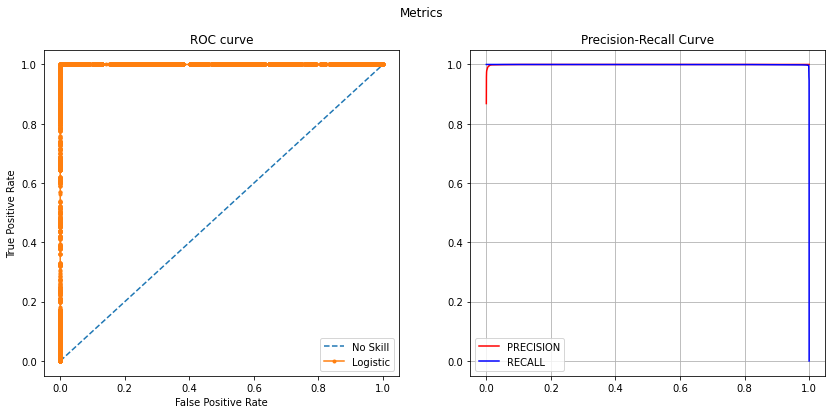

In [24]:
print_corves(pred_proba, y_test)

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (2).

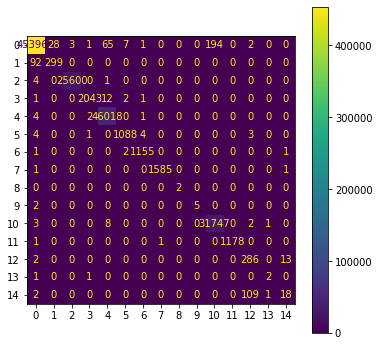

In [35]:
pred = model.predict(X_test)
plot_confusion_matrix(y_test, pred)

In [37]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred, average='weighted'))
print(recall_score(y_test, pred, average='weighted'))
print(f1_score(y_test, pred, average='weighted'))

0.998963888142354
0.9989298461443814
0.998963888142354
0.9989044284036096


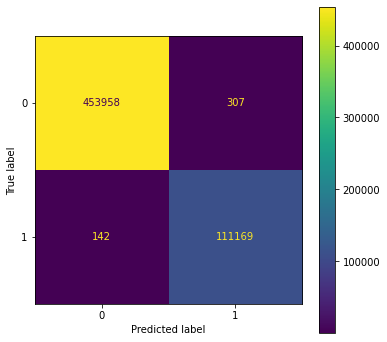

In [27]:
pred = model.predict(X_test)
plot_confusion_matrix(y_test, pred)

In [29]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.9992061190715306
0.9972460439915318
0.9987242949933071
0.9979846220829761


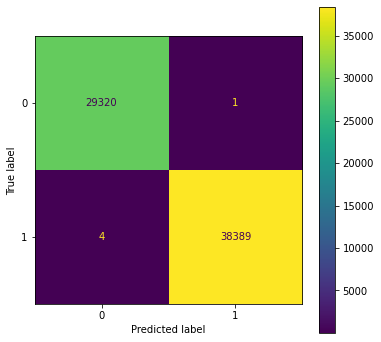

In [26]:
pred = model.predict(X_test)
plot_confusion_matrix(y_test, pred)

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29321
         1.0       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714



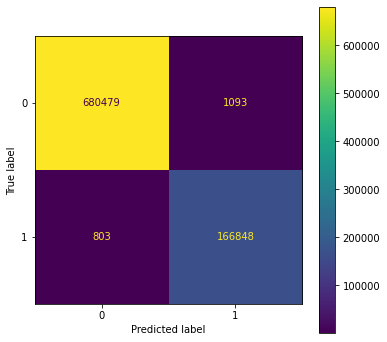

In [23]:
plot_confusion_matrix(y_test, pred)

In [22]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    681572
         1.0       0.99      1.00      0.99    167651

    accuracy                           1.00    849223
   macro avg       1.00      1.00      1.00    849223
weighted avg       1.00      1.00      1.00    849223

